# ML_LogisticRegression

Credits:

- [2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

We’ve explored how to use Linear Regression and its many variations to predict a continuous label. But how can we predict a categorical label?

**Logistic Regression**

Don’t be confused by the use of the term “regression” in its name!
Logistic Regression is a *Classification* algorithm designed to predict categorical target labels. Classification algorithms also often produce a probability prediction of belonging to a class. Notice the “leveling off” behavior of the curve. Any value of x will have an output range between 0 and 1. Many natural real world systems have a “carrying capacity” or a natural limiting factor.

<img src="images/Class.png" width="500" />

Logistic Regression works by transforming a Linear Regression into a classification model through the use of the logistic (*Sigmoid*) function:

<img src="images/Class7.png" width="900" />

<img src="images/Class6.png" width="900" />


Logistic Regression uses Maximum Likelihood to find the best fitting model.

<img src="images/Class10.png" width="900" />


**Classification Performance Metrics**

<img src="images/Class13.png" width="900" />
<img src="images/Class14.png" width="900" />
<img src="images/Class15.png" width="900" />

<a id='toc'></a>

- [Data & EDA](#1)
- [Classification](#2)
    - LogisticRegression(), accuracy_score(), confusion_matrix()
    - plot_confusion_matrix(), classification_report(), precision_score()
    - recall_score(), f1_score(), plot_roc_curve(), plot_precision_recall_curve()
- [Multi-Class Classification](#3)
    - roc_curve(), auc()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[top](#toc)
<a id='1'></a>
## Data & EDA

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed

In [3]:
df = pd.read_csv('data/hearing_test.csv')
df.sample(5)

,age,physical_score,test_result
1549,53.0,38.4,1
4337,53.0,35.2,1
4061,35.0,38.8,1
2473,47.0,36.3,1
3348,49.0,39.7,1


In [4]:
# Stats
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
# How may passed the test
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

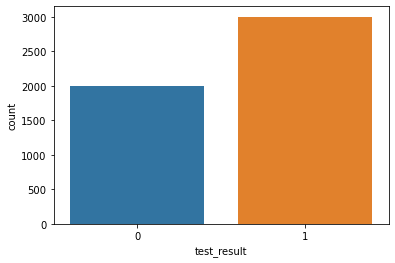

In [6]:
sns.countplot(x='test_result',data=df);

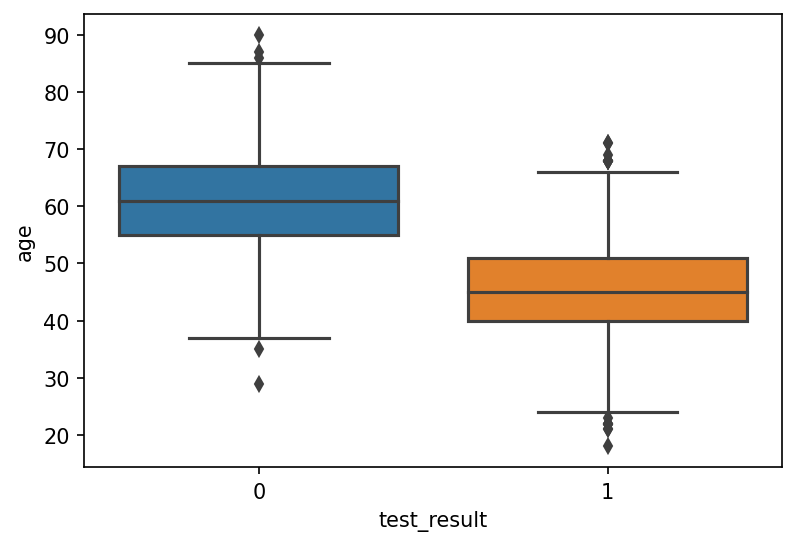

In [7]:
# See the distribution of features per catagory
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='age',data=df);

- Note that the people who do not pass the test are in general older than people who passed the test

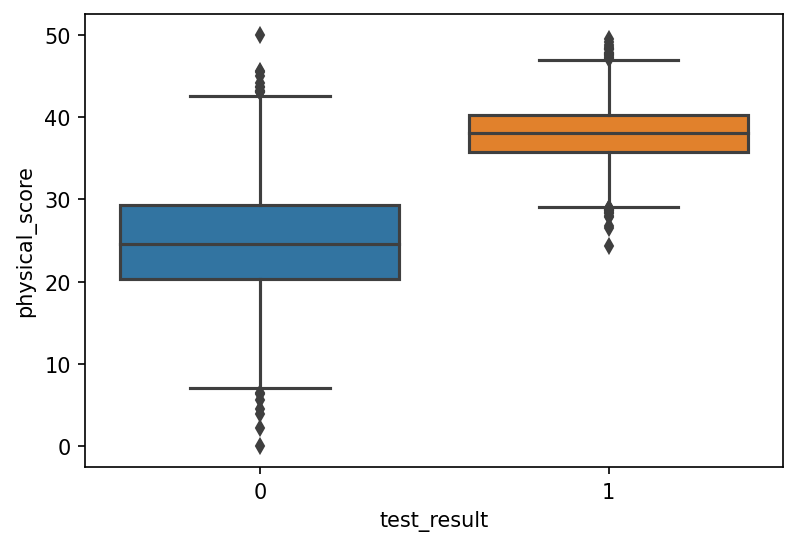

In [8]:
plt.figure(dpi=150)
sns.boxplot(x='test_result',y='physical_score',data=df);

- As expected the people who have lower physical score fail the test while people with higher physical score pass the test.

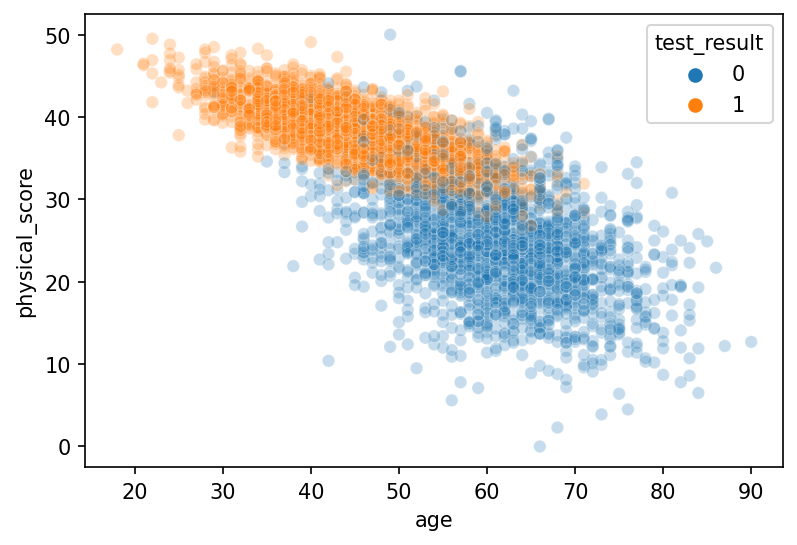

In [16]:
plt.figure(dpi=150)
sns.scatterplot(x='age',y='physical_score',data=df,
                hue='test_result',alpha=0.25);

- In general, the younger people have higher physical score than the older people and they usually pass the test.

<Figure size 900x600 with 0 Axes>

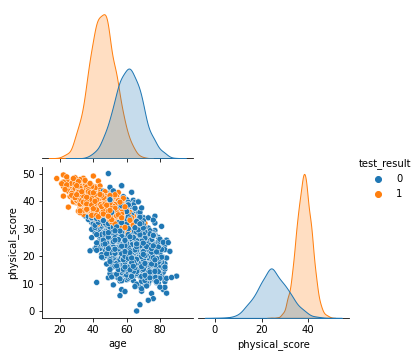

In [19]:
plt.figure(dpi=150)
sns.pairplot(df,hue='test_result',diag_kind='kde',corner=True);

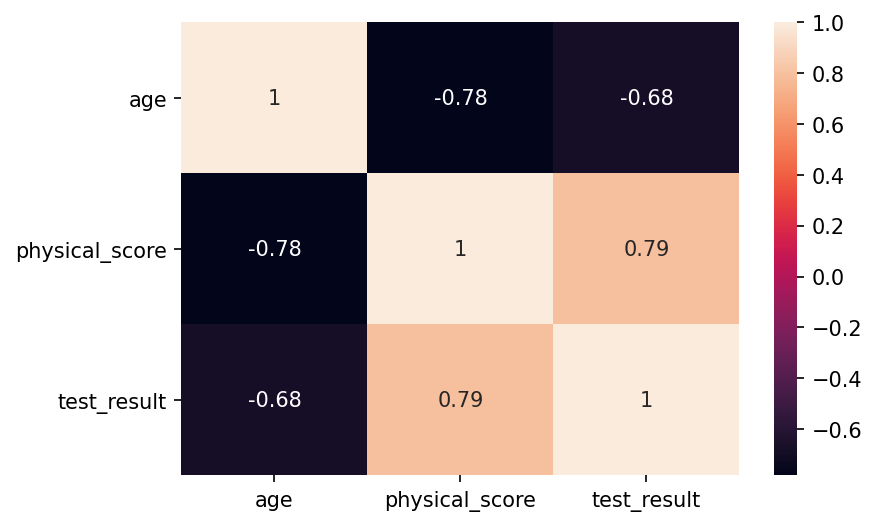

In [20]:
plt.figure(dpi=150)
sns.heatmap(df.corr(),annot=True);

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

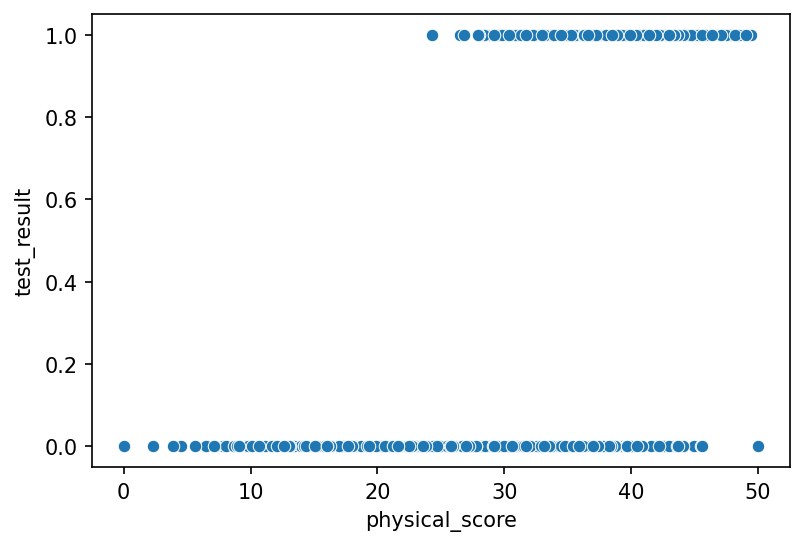

In [21]:
# Scatterplot with one non-continuous variable
plt.figure(dpi=150)
sns.scatterplot(y='test_result',x='physical_score',data=df)

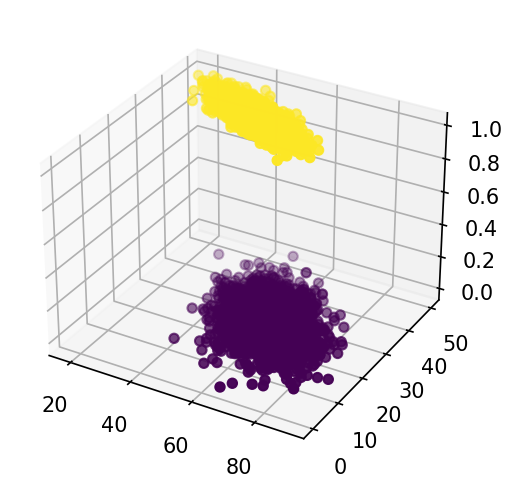

In [24]:
# 3D Scatterplot with one non-continuous variable
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],
           df['test_result'],c=df['test_result']);

- There is a clear separation b/w people that did pass the exam and the people that didn't pass the exam. This means the ML model should be able to score very well on this classification task! 

[top](#toc)
<a id='2'></a>
## Classifficaton

In [25]:
# X and y
X = df.drop('test_result',axis=1)
y = df['test_result']

In [27]:
# Split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.33, random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [29]:
# Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
# Coeffs
log_model.coef_

array([[-0.96752412,  3.51478169]])

This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.
* Based on the ratios with each other, the physical_score indicator is a stronger predictor than age as 3.5>abs(-0.96).

In [88]:
# Best model
grid_model.best_estimator_

LogisticRegression(C=11.28837891684689, l1_ratio=0.7368421052631579,
                   max_iter=5000, multi_class='ovr', penalty='elasticnet',
                   solver='saga')

In [34]:
# Predict
y_pred = log_model.predict(X_test)

In [62]:
# Predict probabilites of belonging to the two classes
log_model.predict_proba(X_test)[0]

array([0.03794292, 0.96205708])

In [40]:
# Accuracy
from sklearn.metrics import accuracy_score

print(f"accuracy = {accuracy_score(y_test,y_pred)}")

accuracy = 0.9084848484848485


confusion matrix :
 [[573  90]
 [ 61 926]]


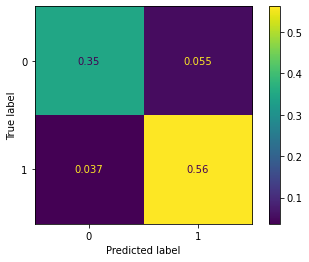

In [49]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

print(f"confusion matrix :\n {confusion_matrix(y_test,y_pred)}")
plot_confusion_matrix(log_model,X_test,y_test,normalize='all');

In [50]:
# Recall, precision, f1-score per class
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       663
           1       0.91      0.94      0.92       987

    accuracy                           0.91      1650
   macro avg       0.91      0.90      0.90      1650
weighted avg       0.91      0.91      0.91      1650



- The data the well balanced

In [55]:
# Recall, precision, f1-score overall (from the confusion matrix)
from sklearn.metrics import precision_score,recall_score,f1_score

print(f"Overall precision = {precision_score(y_test,y_pred)}")
print(f"Overall recall    = {recall_score(y_test,y_pred)}")
print(f"Overall f1-score  = {f1_score(y_test,y_pred)}")

Overall precision = 0.9114173228346457
Overall recall    = 0.9381965552178319
Overall f1-score  = 0.9246130803794309


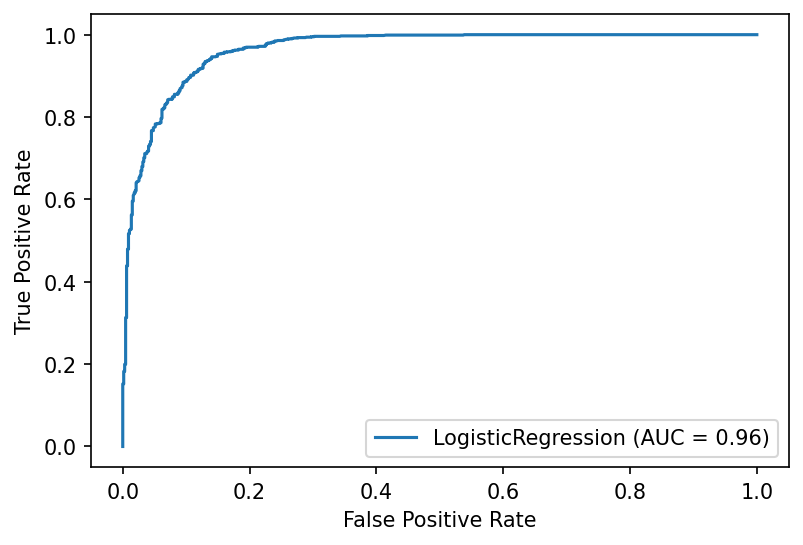

In [60]:
# ROC curve
from sklearn.metrics import plot_roc_curve

fig,ax = plt.subplots(dpi=150)
ax = plot_roc_curve(log_model,X_test,y_test,ax=ax);

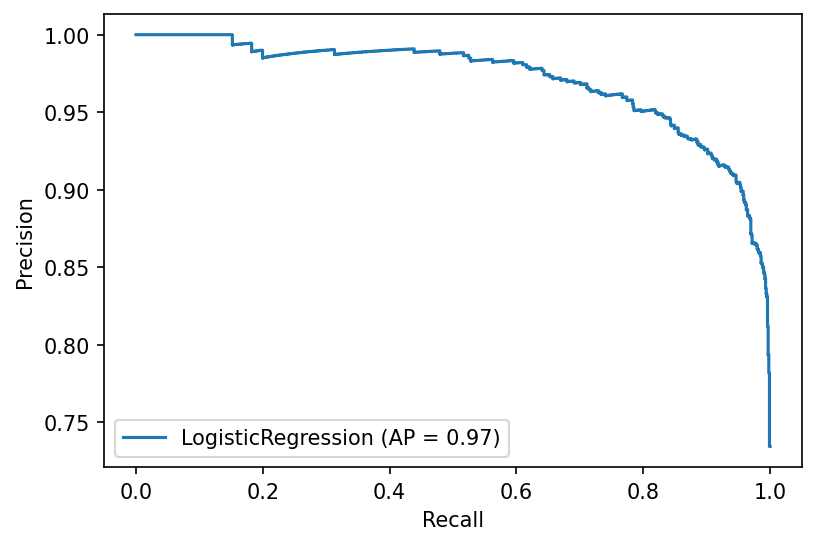

In [61]:
# Precision-recall curve
from sklearn.metrics import plot_precision_recall_curve

fig,ax = plt.subplots(dpi=150)
ax = plot_precision_recall_curve(log_model,X_test,y_test,ax=ax);

[top](#toc)
<a id='3'></a>
## Multi-Class Classificaiton

###  Iris Flower Data Set

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Full Details: [Iris Flower Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [63]:
df = pd.read_csv('data/iris.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica
138,6.0,3.0,4.8,1.8,virginica
81,5.5,2.4,3.7,1.0,versicolor
10,5.4,3.7,1.5,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa


In [65]:
print(f"Classes = {df['species'].unique()}")

Classes = ['setosa' 'versicolor' 'virginica']


### EDA

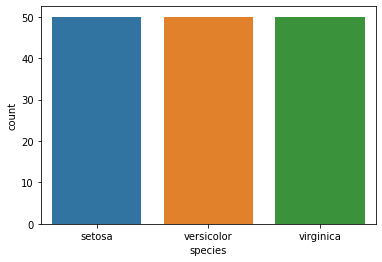

In [69]:
sns.countplot(x='species',data=df);

- Well balanced data

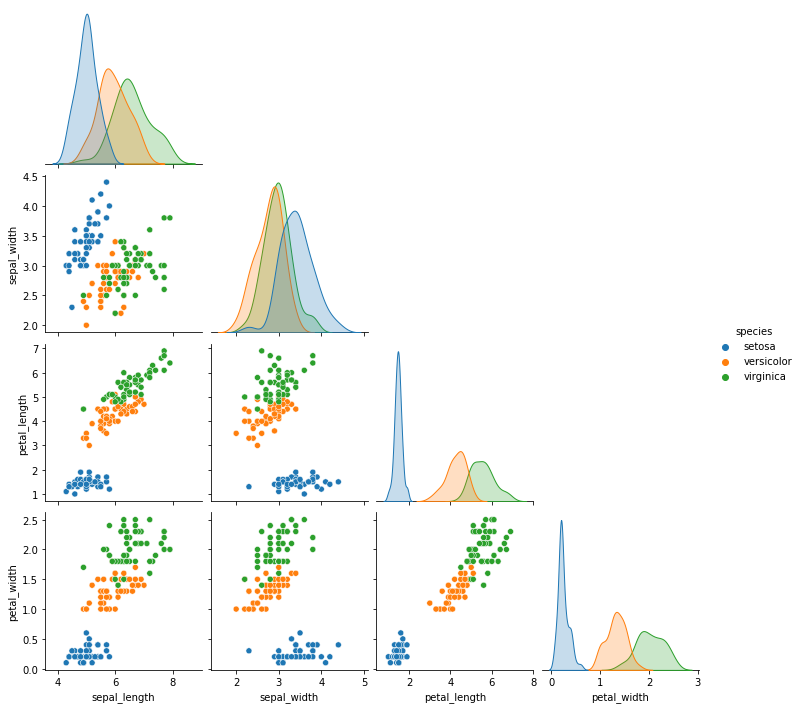

In [73]:
sns.pairplot(df,hue='species',corner=True);

- Seems like setosa is pretty separated, while the remaining two have a lot of cross-over b/w them!

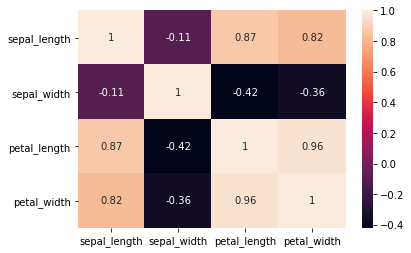

In [75]:
sns.heatmap(df.corr(),annot=True);

- For eg., the petal_length and petal_width have high correalation with sepal_length which makes sense as you'd expect as the petal_length and petal_width get larger so does the sepal_length as its just a large flower.

### Logistic Regerssion

- We do not have to do one-hot-encoding for the labels are sklearn is totally okay with these classes being stings.

accuracy = 1.0 

confusion matrix :
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



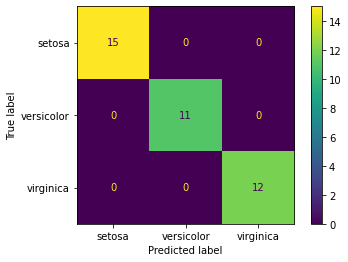

In [82]:
# X and y
X = df.drop('species',axis=1)
y = df['species']

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=42)

# Scale
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

# Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='saga',multi_class='ovr',
                               max_iter=5000)

# Parameter grid
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

parameter_grid = {'penalty':penalty,'l1_ratio':l1_ratio,'C':C}

# Grid model
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(log_model,param_grid=parameter_grid)
grid_model.fit(X_train,y_train)

# Prediciton
y_pred = grid_model.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test,y_pred)} \n")

# Confusion Matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
print(f"confusion matrix :\n {confusion_matrix(y_test,y_pred)}")
plot_confusion_matrix(grid_model,X_test,y_test);

# Recall, precision, f1-score overall (from the confusion matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

#### Evaluating Curves and AUC

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

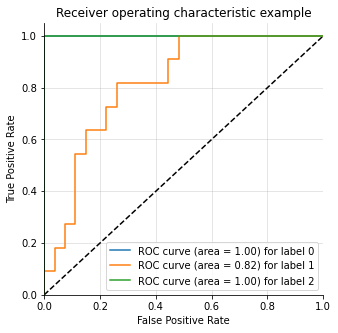

In [84]:
# ROC curve
from sklearn.metrics import roc_curve,auc

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
plot_multiclass_roc(grid_model,X_test,y_test,n_classes=3)

In [85]:
from IPython.core.display import display, HTML
display(HTML('<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))